In [2]:
import pandas as pd # lecture de fichier
import numpy as np # maths
import matplotlib.pyplot as plt # affichage graphique


In [6]:
#contenu du jeu de données
reg_simple=pd.read_csv('reg_simple.csv',sep=',')
reg_simple

colonnes : Index(['heure_rev', 'note'], dtype='object')  - nombre d'observations : 27


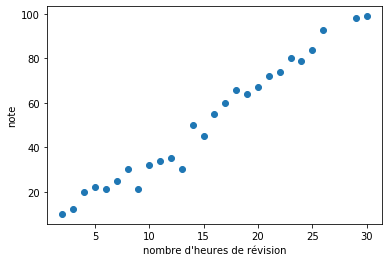

In [7]:
# Visualisation des données
nobs = len(reg_simple)
print("colonnes :", reg_simple.columns, " - nombre d'observations :", nobs)
plt.scatter(reg_simple["heure_rev"], reg_simple["note"])
plt.xlabel('nombre d\'heures de révision')
plt.ylabel('note')
plt.show()


In [9]:
# Création du modèle (model(X,theta))
a = np.array(reg_simple)
m = a.shape[0]
x = a[:,0]
x = x[:, np.newaxis]
y = a[:,1]
y = y[:, np.newaxis]
X = np.hstack((x, np.ones(x.shape)))


In [10]:
theta = np.random.randn(2,1)
theta

array([[-0.61994283],
       [-1.96004441]])

In [11]:
def model(X, theta):
	return X.dot(theta)


In [12]:
# Fonction du coût (fonction_cout(X,y,theta))
def fonction_cout(X, y, theta):
	return 1/(2*m) * np.sum((X.dot(theta) - y)**2)


In [13]:
def gradient(X,y,theta):
	return 1/m * X.T.dot(X.dot(theta) - y)

In [14]:
# Descente du gradient (descente_gradient(X,y,theta,alpha,n_iterations))
# 1°) Initialiser avec x0(au hasard) -- ok
# 2°) Répéter theta(𝑡+1) = theta(𝑡) − alpha × ∇𝑓(theta(𝑡) 
# 3°)Jusqu’à convergence
def descente_gradient(X,y,theta,alpha,n_iterations):
	for i in range(n_iterations): #2°
		theta = theta - alpha*gradient(X, y, theta)
	return theta

In [16]:
theta1 = descente_gradient(X, y, theta, 0.001, 500)
print(theta1) # a = 3.393 ; b = -0.581
theta2 = descente_gradient(X, y, theta, 0.001, 50)
print(theta2) # a = 3.398 ; b = -0.687
theta3 = descente_gradient(X, y, theta, 0.0001, 10000)
print(theta3) # a = 3.403 ; b = -0.779
theta4 = descente_gradient(X, y, theta, 0.005, 1000)
print(theta4) # a = 3.360 ; b = -0.007

[[ 3.44147239]
 [-1.52355911]]
[[ 3.45192302]
 [-1.72631572]]
[[ 3.43100983]
 [-1.32057318]]
[[ 3.37824403]
 [-0.29685452]]


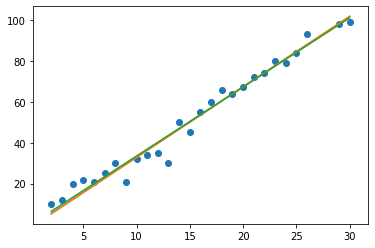

In [17]:
plt.plot(x, model(X, theta1))
plt.plot(x, model(X, theta2))
plt.plot(x, model(X, theta4))
plt.scatter(x, y)
plt.show()


In [18]:
print(fonction_cout(X, y, theta1))
print(fonction_cout(X, y, theta2))
print(fonction_cout(X, y, theta3))
print(fonction_cout(X, y, theta4)) 

### la fonction coût est la plus faible pour theta4 : ce sont les meilleurs paramètres
print(theta4)


10.307979097236426
10.39964213103433
10.225263647598446
9.946115740546103
[[ 3.37824403]
 [-0.29685452]]


In [20]:
# Evaluer votre modèle en utilisant le coefficient de détermination


def r2(X, y, y_pred): 
	return 1 - (np.sum((y - y_pred)**2) / np.sum((y - np.mean(y))**2))

y_pred = model(X, theta4)

print(r2(X, y, y_pred)) # 0.9731628819289049




0.9731628819289049
